# Basic Strategy for Dealing with Small Datasets

* Create a naive convnet model without regularization to set a baseline for what can be achieved.
* Data Augmentation: to prevent overfitting.
* Feature extraction with a pretrained network.
* Fine tuning a pretrained network.

In this notebook, we create a naive convnet model without regularization.

In [1]:
import os

base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')                           

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
                                             
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')                               

### The Model

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 

model.add(layers.Flatten()) 
model.add(layers.Dense(units=512, activation='relu')) 
model.add(layers.Dense(units=1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Compiling Model

In [4]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Processing Raw Image Data

* Takes the path to a directory & generates batches of augmented data.

```python
ImageDataGenerator.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
```

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Fitting the Model

In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 78s 776ms/step - loss: 0.6915 - acc: 0.5385 - val_loss: 0.6767 - val_acc: 0.5410
Epoch 2/30
100/100 [==============================] - 72s 723ms/step - loss: 0.6618 - acc: 0.6015 - val_loss: 0.6570 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 78s 782ms/step - loss: 0.6337 - acc: 0.6440 - val_loss: 0.6225 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 79s 787ms/step - loss: 0.5957 - acc: 0.6765 - val_loss: 0.7616 - val_acc: 0.5740
Epoch 5/30
100/100 [==============================] - 74s 739ms/step - loss: 0.5820 - acc: 0.6895 - val_loss: 0.5902 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 73s 727ms/step - loss: 0.5520 - acc: 0.7235 - val_loss: 0.5916 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 77s 767ms/step - loss: 0.5388 - acc: 0.7275 - val_loss: 0.6463 - val_acc: 0.6520
Epoch 8/30
100/100 [==============================] - 7

In [7]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Training and Validation Accuracy and Loss

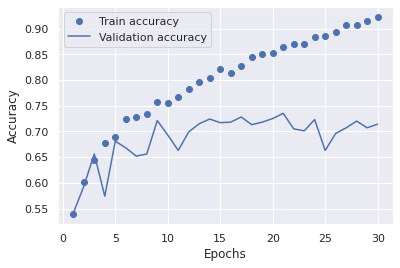

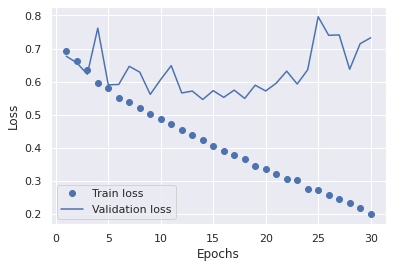

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


epochs = range(1, len(history.history['loss']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
print(history.history['acc'][-3:])

[0.9070000052452087, 0.9144999980926514, 0.9229999780654907]


In [20]:
print(history.history['loss'][-3:])

[0.23272569477558136, 0.2196584790945053, 0.19895720481872559]


These curves are characteristic of overfitting. The training accuracy increases almost linearly with the number of epochs and reaches 92% after 30 epochs. But the validation accuracy stalls at around 70%. The loss decreases linearly till until 20% but the validation loss hovers around 55%.